# Multiclass Classification with in Keras

## Review
## Review

### Multi-Layered Perceptrons
In the previous lessons, you learned about densely connected feed-forward neural networks. These are also commonly called MLPs or Multi-Layered Perceptrons.

### Model Structure and Forward Propagation

#### Nodes and Layers
You learned that these models make predictions by ingesting data into their input layers and passing the data through some number of hidden layers. Finally, an output layer produces a prediction.  You learned that the input layer has one node for each feature in the training data, each hidden layers can have any number of nodes, and that the number of nodes in the output layer depends on the type of problem your model is solving.

#### Parameters
In an MLP, the outputs of all nodes in one layer are passed to all nodes in the next layer.  Each node has a number of weights equal to its number of inputs plus one bias term.  These are collectively called parameters and form the 'intelligence' of the model.  Parameters change as the model learns to make better predictions.

#### Activation Functions
You also learned that hidden layers should each have a non-linear activation function to allow the model to find non-linear patterns in the data.  While activation functions in the hidden layers can be chosen by the model creator, the activation function in the output layer is dependent on the problem being solved.  Input layers should not have activation functions.

#### Cost Functions
You also learned about the cost functions which models use to determine the success of their predictions.  These functions help them determine how to change the parameters of each node in each learning epoch.  This cost function, like the output layer, will be specific to the problem being solved.

### Backward Propagation and Gradient Descent.
Finally, you learned about gradient descent, which tells a model how and how much to change each parameter.  The process of backward propagation applies gradient descent to each layer of the model, starting at the output and moving backward to the input.

### Keras
In the previous lesson you learned how to use the Keras API with a Tensorflow backend to easy construct and train neural networks.  You used the `Sequential` model type and `Input` and `Dense` layers to construct, compile, and train a model.

## Multiclass Classification

Binary classification models attempt to divide samples into two classes.  Multiclass classification models divide data into three or more classes.  Sometimes models are trained to identify and classify hundreds of different classes of samples, complicating predictions as well as evaluation.

## Special Considerations for Deep Learning

With binary classification your mode outputted a single float value for each sample.  With multi-class classification our model will output one float for each clas, for each sample, representing the probability of the samples belonging to a particular class

### One-hot Encode the Targets

In this demonstration we will one-hot encode the targets for the model.  Each class will have it's own column in the y variable.

### Final Layer Nodes

Since we we want our model to output a probability for each class, it must have a node for each class in the output layer.

### Final Activation Function: Softmax
When you created a binary classification model you used a **sigmoid** activation function in the final layer.  This caused the model output to be the probability that a sample was a member of the positive class (or class 1).  You then used that probability to decide which class to assign the sample to.  If you used rounding, then any sample with an equal or greater than 50% chance of belonging to class 1 was assigned to class one, and any with less than 50% chance was assigned to class 0.

In multiclass classification we have to take a different approach.  Instead we will use the **softmax** activation function, which outputs a probability for each class.  In this case we generally assign a sample to the class with the highest probability.

#### <center> Softmax Function</center>

$$
\text{Softmax}(x_i) = \frac{\exp(x_i)}{\sum_{j=1}^{N} \exp(x_j)}
$$


$$
\begin{aligned}
&\bold{x_i}: \text{The $i$-th element of the input vector.} \\
&\bold{N}: \text{The number of elements in the input vector (total classes).} \\
&\bold{exp(x_i)}: \text{The exponential function applied to $x_i$.} \\
&\bold{\sum_{j=1}^{N} \exp(x_j)}: \text{The sum of exponential values for all elements.} \\
&\bold{\text{Softmax}(x_i)}: \text{The final probability for the $i$-th class.}
\end{aligned}
$$

### Loss Function

With binary classification you determined the model loss using **binary crossentropy**.  However, with more than two classes, we will instead use **categorical crossentropy**.  If were were not one-hot encoding our target we would use **sparse categorical crossentropy**

### Predictions

Finally, in order to use Scikit-Learn evaluation functions, such as ``classification_report()`` and ``ConfusionMatrixDisplay()`` we need to collapse our predictions back to a single class for each sample.  We will do this with ``np.argmax(axis=1)``.  This function will return the index of the largest argument in the specified axis, effectively telling us which class the model predicts the sample is most likely a member of.

# The Data

For this demonstration we will be using 64 pixen (8 by 8) images of handwritten numerals between 0 and 9.  Each column represents a pixel value and each row represents a sample.  Our model will examine the pixel values and classify each handwritten numeral into the integer it represents.

The data comes from the UCI ML repository and we will download it directly through their API below.  

In [68]:
#Import Pandas, etc.
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)

import numpy as np
import matplotlib.pyplot as plt

#Keras
from keras import layers
from keras import models
from keras import callbacks

#Sklearn
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn import set_config
set_config(transform_output='pandas')


**If necessary, uncomment the cell below to install the UCI repository Python package.**

In [69]:
# Install the UCI ML Repository package if necessary
# !pip install ucimlrepo

In [70]:
## Code adapted from https://github.com/uci-ml-repo/ucimlrepo
from ucimlrepo import fetch_ucirepo
  
# fetch dataset 
digits = fetch_ucirepo(id=80) 
  
# data (as pandas dataframes) 
X = digits.data.features 
y = digits.data.targets

X.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,Attribute21,Attribute22,Attribute23,Attribute24,Attribute25,Attribute26,Attribute27,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34,Attribute35,Attribute36,Attribute37,Attribute38,Attribute39,Attribute40,Attribute41,Attribute42,Attribute43,Attribute44,Attribute45,Attribute46,Attribute47,Attribute48,Attribute49,Attribute50,Attribute51,Attribute52,Attribute53,Attribute54,Attribute55,Attribute56,Attribute57,Attribute58,Attribute59,Attribute60,Attribute61,Attribute62,Attribute63,Attribute64
0,0,1,6,15,12,1,0,0,0,7,16,6,6,10,0,0,0,8,16,2,0,11,2,0,0,5,16,3,0,5,7,0,0,7,13,3,0,8,7,0,0,4,12,0,1,13,5,0,0,0,14,9,15,9,0,0,0,0,6,14,7,1,0,0
1,0,0,10,16,6,0,0,0,0,7,16,8,16,5,0,0,0,11,16,0,6,14,3,0,0,12,12,0,0,11,11,0,0,12,12,0,0,8,12,0,0,7,15,1,0,13,11,0,0,0,16,8,10,15,3,0,0,0,10,16,15,3,0,0
2,0,0,8,15,16,13,0,0,0,1,11,9,11,16,1,0,0,0,0,0,7,14,0,0,0,0,3,4,14,12,2,0,0,1,16,16,16,16,10,0,0,2,12,16,10,0,0,0,0,0,2,16,4,0,0,0,0,0,9,14,0,0,0,0
3,0,0,0,3,11,16,0,0,0,0,5,16,11,13,7,0,0,3,15,8,1,15,6,0,0,11,16,16,16,16,10,0,0,1,4,4,13,10,2,0,0,0,0,0,15,4,0,0,0,0,0,3,16,0,0,0,0,0,0,1,15,2,0,0
4,0,0,5,14,4,0,0,0,0,0,13,8,0,0,0,0,0,3,14,4,0,0,0,0,0,6,16,14,9,2,0,0,0,4,16,3,4,11,2,0,0,0,14,3,0,4,11,0,0,0,10,8,4,11,12,0,0,0,4,12,14,7,0,0


In [71]:
# Check for duplicates
print("Number of duplicate rows: ", X.duplicated().sum())

Number of duplicate rows:  0


In [72]:
# Check for missing values
print("Number of missing values: ", X.isnull().sum().sum())

Number of missing values:  0


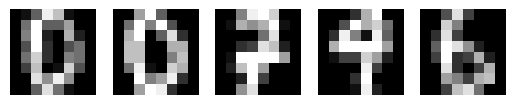

,class
0,0
1,0
2,7
3,4
4,6


In [73]:
# Show the first 5 images and their classes
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X.iloc[i].values.reshape(8,8), cmap='gray')
    plt.axis('off')
plt.show()
display(y.iloc[:5])

You can see the greyscale images above which make up the features, along with their target values.

In [74]:
# Check Value Counts
display(y.value_counts().sort_index())

class
0        554
1        571
2        557
3        572
4        568
5        558
6        558
7        566
8        554
9        562
dtype: int64

## LabelBinarizer

In the cell below we prepare our targets for the model by one-hot encoding them, or binarizing them. Be sure to keep track of the `LabelBinarizer.classes_`.  By default the `LabelBinarizer` will order the columns numerically by the class number.

This transformation does not carry the risk of data leakage, so we can do it before our data split or after.

In [75]:
# Binarize (one-hot encode) the target variable
label_bin = LabelBinarizer()
y_binary = label_bin.fit_transform(y)
classes = label_bin.classes_

print(classes)
y_binary[:5]

[0 1 2 3 4 5 6 7 8 9]


array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]])

## Data Split

Here we split our data into training, validation, and testing data.  We will use the training data to train the model, the validation data to identify overfitting and compare one model against the others, and the testing data only for final evaluation of the model we would choose for deployment.

In [76]:
## Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.4, random_state=42, stratify=y_binary)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)

# Scaling

Empirical research suggests that models will converge more quickly and accurately if input features are between 0 and 1.  We will use `MinMaxScaler` to scale our data to this range.

In [77]:
# Scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Create model

We will create a somewhat robust model to classify our digits.  

**Notice** 

* The output layer shape is the number of classes in the target 
* The activation function is **softmax**
* The loss function is **categorical_crossentropy**


In [78]:
# Define the input and output shapes
input_shape = X_train.shape[1]
output_shape = len(classes)
print("Input shape: ", input_shape)
print("Output shape: ", output_shape)


# Define the model using a function
def build_model():

    # Instantiate a sequential model
    model = models.Sequential()

    # Add the layers
    model.add(layers.Input(shape=(input_shape,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))

    # Add the output layer
    model.add(layers.Dense(output_shape, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


Input shape:  64
Output shape:  10


In [79]:
## Build the model
model = build_model()
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)                │      4,160 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_13 (Dense)                │ (None, 32)                │      2,080 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_14 (Dense)                │ (None, 16)                │        528 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_15 (Dense)                │ (None, 10)                │        170 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 6,938 (27.10 KB)

 Trainable params: 6,938 (27.10 KB)

 Non-trainable params: 0 (0.00 B)

# Model Training

We will train the model on the training data and validate it with the validation data.  We are careful to save the history object to plot the learning curve.

In [80]:
## Train the model and save the history
history = model.fit(X_train, y_train, 
                epochs=100, batch_size=32, 
                validation_data=(X_val, y_val),
                verbose=0)

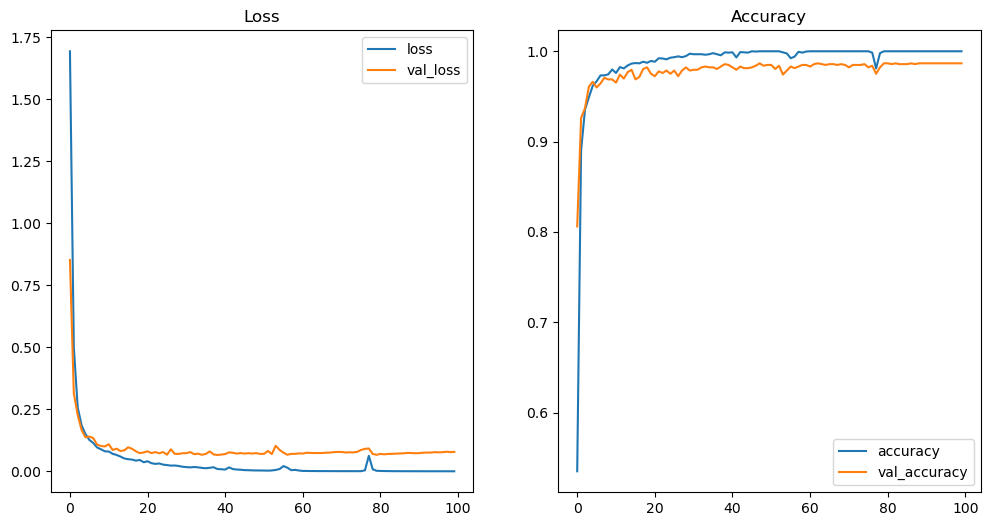

In [81]:
# define a function to plot the history
def plot_history(history):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].plot(history.history['loss'], label='loss')
    axes[0].plot(history.history['val_loss'], label='val_loss')
    axes[0].set_title('Loss')
    axes[1].plot(history.history['accuracy'], label='accuracy')
    axes[1].plot(history.history['val_accuracy'], label='val_accuracy')
    axes[1].set_title('Accuracy')
    for ax in axes:
        ax.legend()

# Plot the history
plot_history(history)

# Evaluate the Model

Our plot above shows a nice hockey-stick shaped learning curve with only slight overfitting represented by a visibly lower training loss line than validation loss line.  Our accuracy curve shows we are nearing perfect predictions on the training set and in the mid-90s on the validation data.

Below we will do a more rigorous evaluation of our model.

## Evaluating Multiclass Keras Models.

Notice in the evaluation function below that we use `np.argmax(axis=1)` to isolate the class with the highest probability.  This collapses our (num_samples, num_classes) shaped targets and probability predictions into a single integer prediction for each image.  From there we leverage the Scikit-Learn classification evaluation functions to get metrics and a confusion matrix for each of the 10 classes.

In [82]:
def evaluate_multiclasss(model, X, y):
    # Prepare the predictions for the confusion matrix and classification report
    y_testnp = np.argmax(y, axis=1)
    y_pred = np.argmax(model.predict(X), axis=1)

    # print the classification report
    print(classification_report(y_testnp, y_pred, zero_division=0))
    
    # plot the confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_testnp, y_pred)
    plt.show()

Training Set Evaluation
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       343
           2       1.00      1.00      1.00       334
           3       1.00      1.00      1.00       343
           4       1.00      1.00      1.00       341
           5       1.00      1.00      1.00       335
           6       1.00      1.00      1.00       335
           7       1.00      1.00      1.00       340
           8       1.00      1.00      1.00       332
           9       1.00      1.00      1.00       337

    accuracy                           1.00      3372
   macro avg       1.00      1.00      1.00      3372
weighted avg       1.00      1.00      1.00      3372



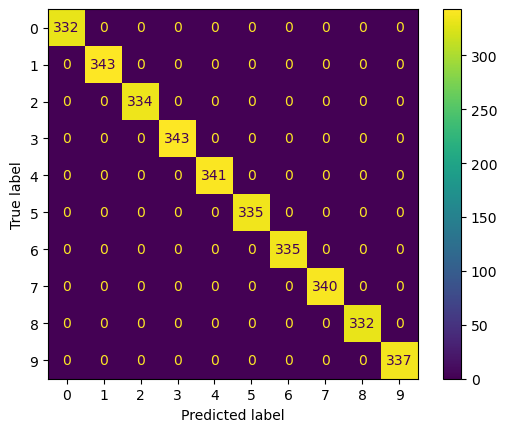

Validation Set Evaluation
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       111
           1       0.97      0.97      0.97       114
           2       1.00      0.99      1.00       112
           3       0.99      0.98      0.99       114
           4       0.99      0.98      0.99       113
           5       1.00      0.99      1.00       111
           6       0.99      0.99      0.99       112
           7       0.99      0.99      0.99       113
           8       0.96      0.98      0.97       111
           9       0.97      0.99      0.98       113

    accuracy                           0.99      1124
   macro avg       0.99      0.99      0.99      1124
weighted avg       0.99      0.99      0.99      1124



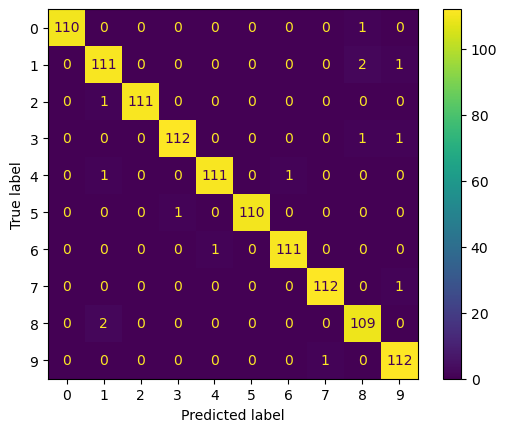

In [83]:
# Evaluate the model
print("Training Set Evaluation")
evaluate_multiclasss(model, X_train, y_train)
print("Validation Set Evaluation")
evaluate_multiclasss(model, X_val, y_val)

## Final Evaluation

Since we are only creating the one model in this demonstration, we will go ahead and evaluate it using our hold-out test data.

Test Set Evaluation
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       111
           1       0.98      0.97      0.98       114
           2       0.98      0.99      0.99       111
           3       0.99      0.97      0.98       115
           4       1.00      0.98      0.99       114
           5       0.97      0.97      0.97       112
           6       0.96      0.98      0.97       111
           7       0.99      0.99      0.99       113
           8       0.96      0.96      0.96       111
           9       0.97      1.00      0.99       112

    accuracy                           0.98      1124
   macro avg       0.98      0.98      0.98      1124
weighted avg       0.98      0.98      0.98      1124



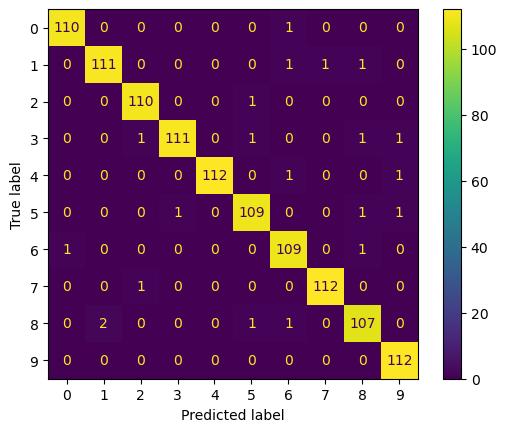

In [84]:
# evaluate the model on the test set
print("Test Set Evaluation")
evaluate_multiclasss(model, X_test, y_test)

# Conclusion

Our model is performing close to perfectly.  It turns out this is not a hard problem for the model to solve.  This is likely because each digit was carefully framed.  If the digits ranged in location from left to right, top to bottom, or appeared with other backgrounds, we would need are more specialized model, such as a **Convolutional Neural Network** designed for image data.

## Summary
In this lesson you learned how to create a multiclass class classification model and used it to classify handwritten digits into their integer representations.  You learned to prepare the targets with one-hot encoding, to ensure that the output layer had a neuron for each class and a **softmax** activation function.  You were also sure to use the **categorical_crossentropy** loss function.  In order to prepare your predictions for Scikit-Learn evaluation functions, you used `np.argmax(axis=1)` to determine which class each sample most likely belonged to.

# Challenge

Classify types of glass through various measurements using a neural network.  Run the cell below to load the UCI glass dataset and try to get the best metrics you can by creating and tuning a multiclass Kera deep learning model using what you have learned in this lesson.  We've gotten you started with the code to load the data below.

## Data Dictionary:

**Features descriptions**

1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron

**Class Labels: Type of glass**

1. building_windows_float_processed
2. building_windows_non_float_processed
3. vehicle_windows_float_processed
4. vehicle_windows_non_float_processed (none in this database)
5. containers
6. tableware
7. headlamps

In [89]:
# import glass dataset from ucimlrepo
glass = fetch_ucirepo(id=42)
X = glass.data.features
y = glass.data.targets
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0
